In [1]:
# https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy-integrate-odeint-1.py

In [3]:
import numpy as np

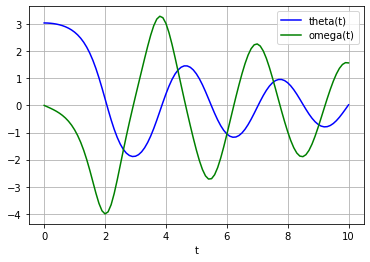

In [5]:
# The second order differential equation for the angle `theta` of a
# pendulum acted on by gravity with friction can be written::

# theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0

# where `b` and `c` are positive constants, and a prime (') denotes a
# derivative.  To solve this equation with `odeint`, we must first convert
# it to a system of first order equations.  By defining the angular
# velocity ``omega(t) = theta'(t)``, we obtain the system::

# theta'(t) = omega(t)
# omega'(t) = -b*omega(t) - c*sin(theta(t))

# Let `y` be the vector [`theta`, `omega`].  We implement this system
# in python as:

def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt
# ...

# We assume the constants are `b` = 0.25 and `c` = 5.0:

b = 0.25
c = 5.0

# For initial conditions, we assume the pendulum is nearly vertical
# with `theta(0)` = `pi` - 0.1, and it initially at rest, so
# `omega(0)` = 0.  Then the vector of initial conditions is

y0 = [np.pi - 0.1, 0.0]

# We generate a solution 101 evenly spaced samples in the interval
# 0 <= `t` <= 10.  So our array of times is:

t = np.linspace(0, 10, 101)

# Call `odeint` to generate the solution.  To pass the parameters
# `b` and `c` to `pend`, we give them to `odeint` using the `args`
# argument.

from scipy.integrate import odeint
sol = odeint(pend, y0, t, args=(b, c))

# The solution is an array with shape (101, 2).  The first column
# is `theta(t)`, and the second is `omega(t)`.  The following code
# plots both components.

import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()